In [ ]:
## Aufgabe 

In [4]:
install.packages("PASWR")
library("PASWR")

Installing package into ‘/home/veith/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Loading required package: e1071
Loading required package: MASS
Loading required package: lattice


In [14]:
data(Washer)
summary(Washer)

   diameters    
 Min.   :3.850  
 1st Qu.:3.942  
 Median :3.990  
 Mean   :3.986  
 3rd Qu.:4.032  
 Max.   :4.120  

diameters
4.06
4.02
4.04
4.04
3.97
3.87
4.03
3.85
3.91
3.98


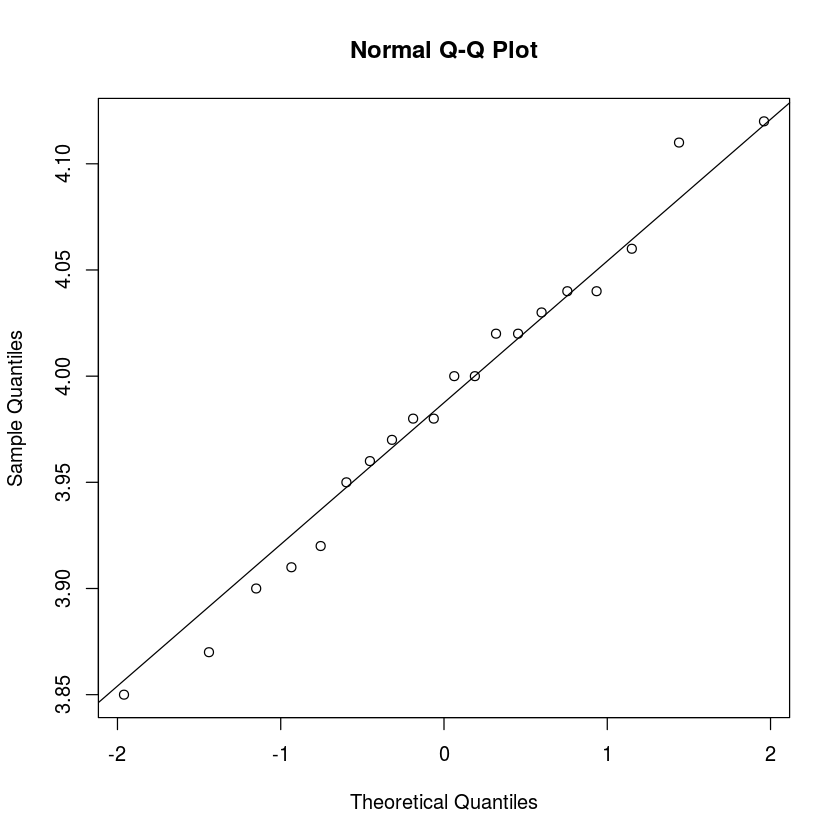

In [16]:
qqnorm(Washer$diameter)
qqline(Washer$diameter)

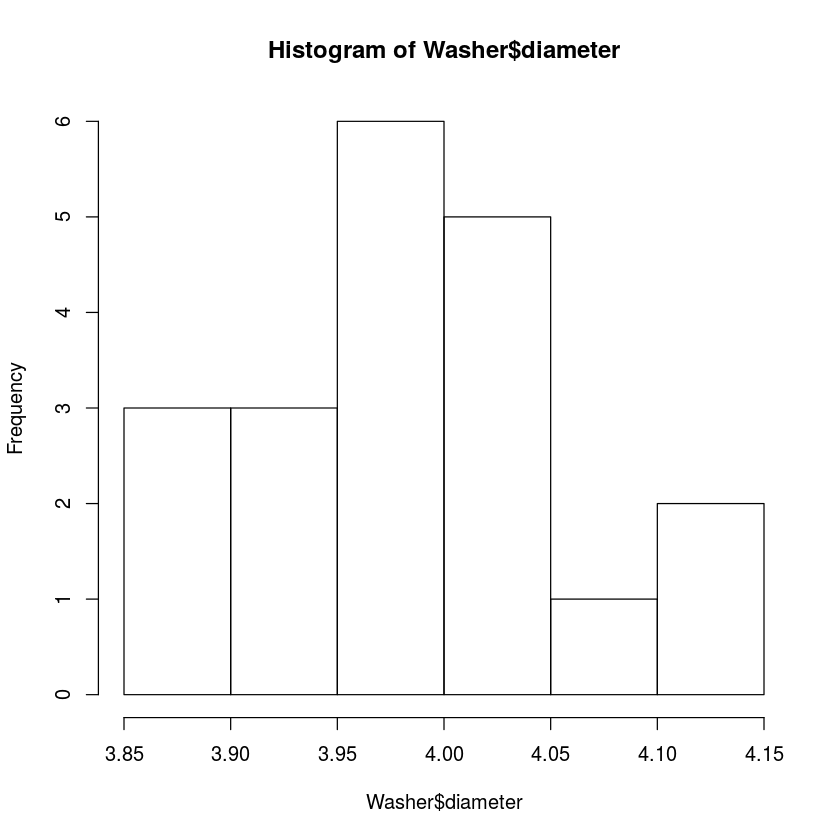

In [17]:
hist(Washer$diameter)

H0: $$Var_m(d) <= Var_{m-1}(d)$$
H1: $$Var_m(d) > Var_{m-1}(d)$$

In [57]:
variance = var(Washer$diameter)

S.squared = 1/19 * sum((Washer$diameter - mean(Washer$diameter))^2)
csq =  (19 * S.squared)/0.004
c(csq, qchisq(0.95, 19))

# Lehne nicht ab

[1] 25.26375 30.14353

[1] 18.40571

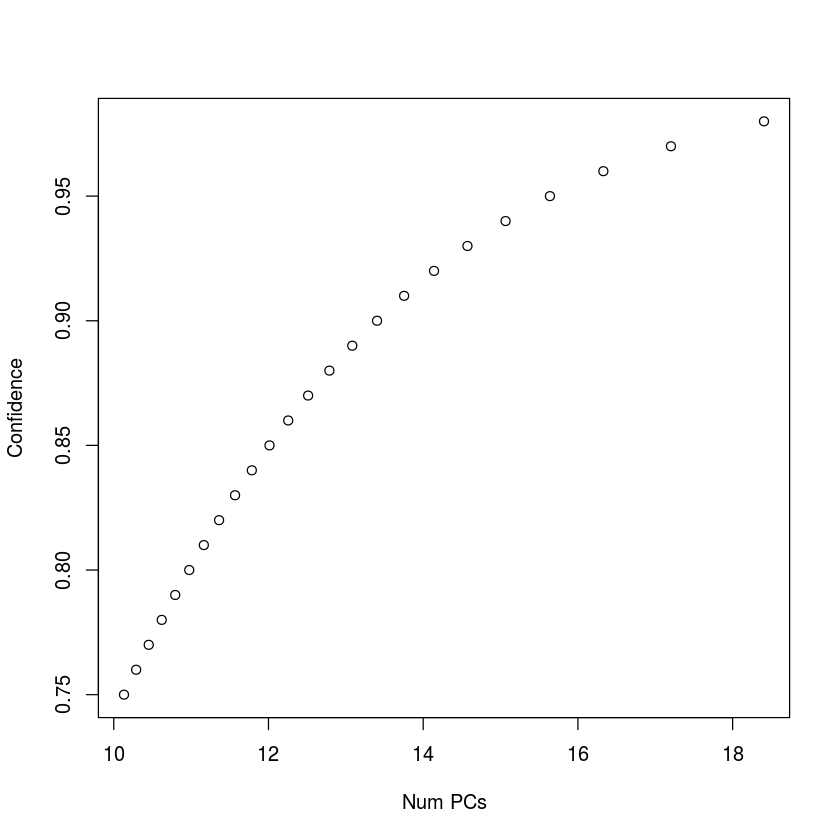

In [85]:
# h0: Akkulaufzeit =< 10.5
# H1: Akkulaufzeit > 10.5
# t-test nutzen


test_num_pcs <- function(x) {
    power.t.test(n=NULL, delta=11.5-10.5, sd=0.9, sig.level=0.01,
                 power=x, type="one.sample", alternative="one.sided")$n
}

test_num_pcs(0.98)

check_power = seq(0.75, 0.98, 0.01)
size_vs_power = sapply(check_power, test_num_pcs)
plot(check_power ~ size_vs_power, ylab="Confidence", xlab="Num PCs")

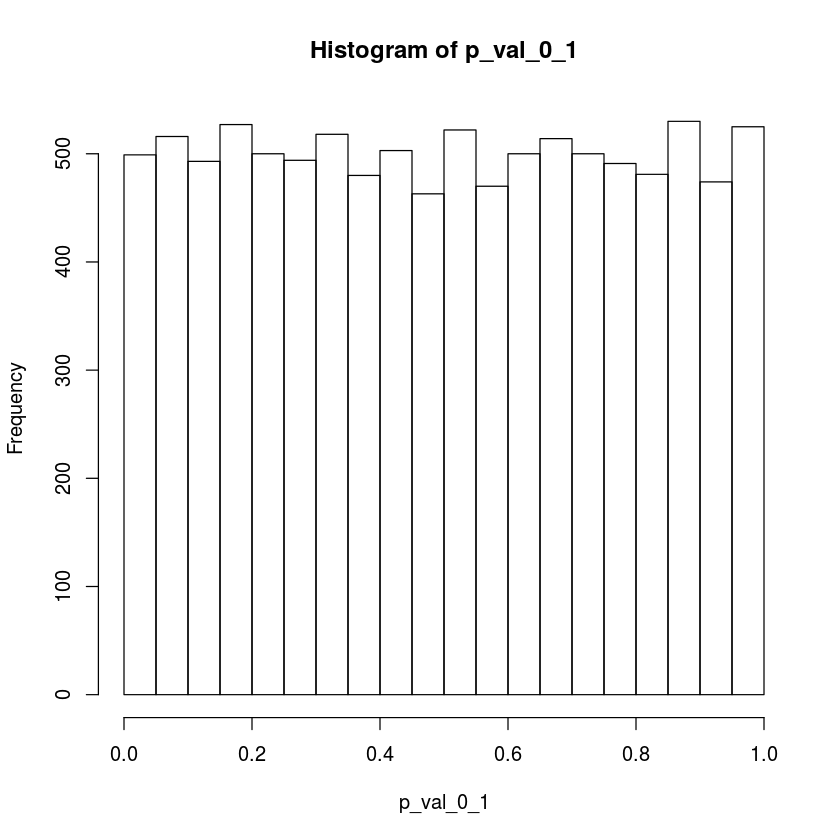

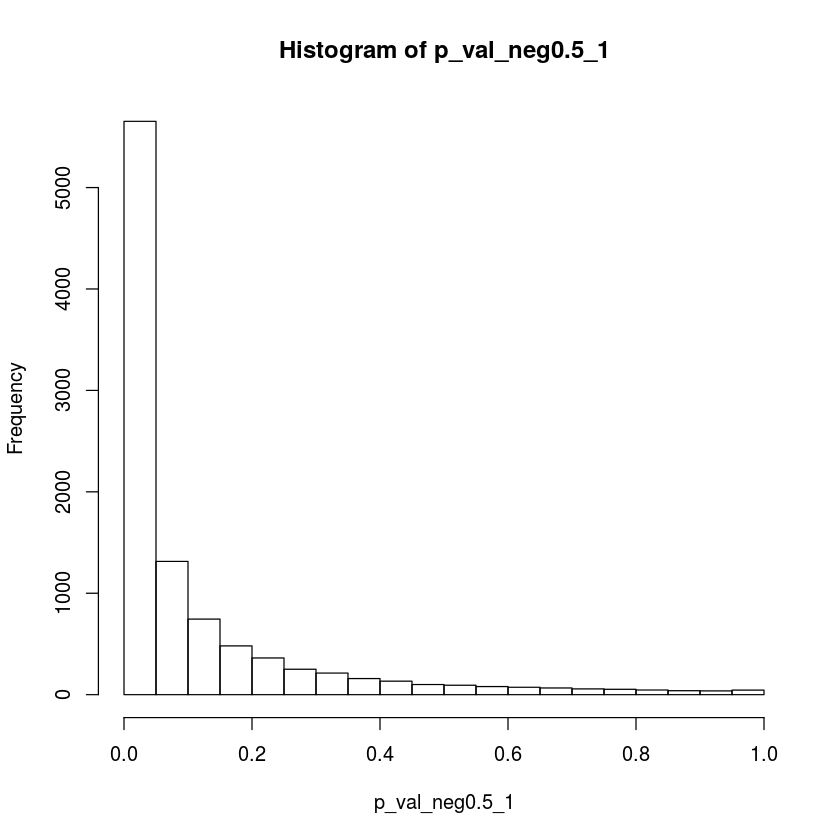

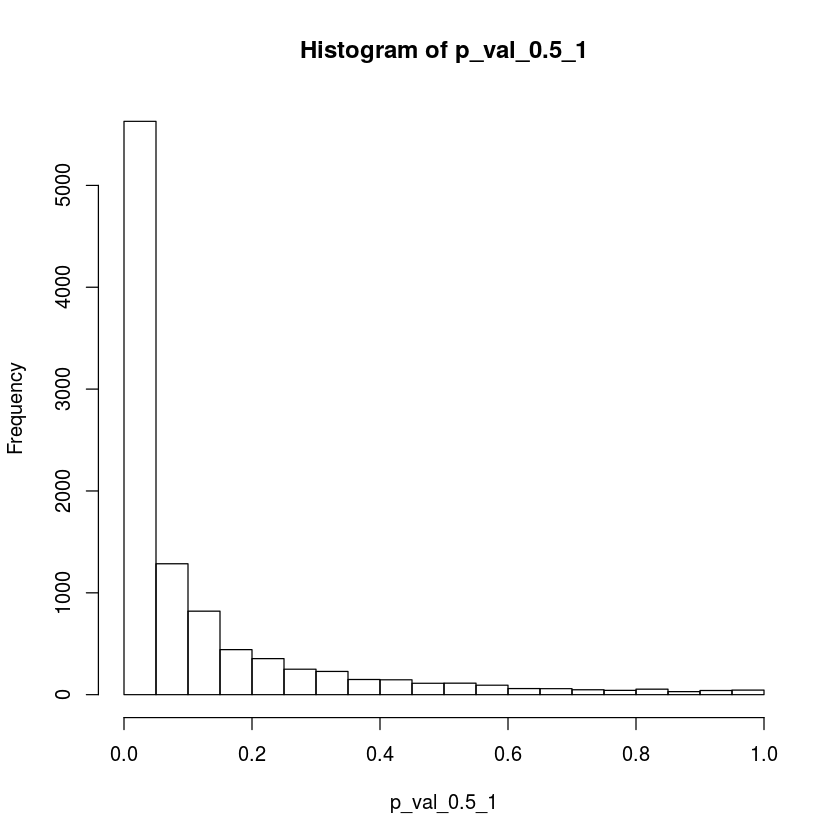

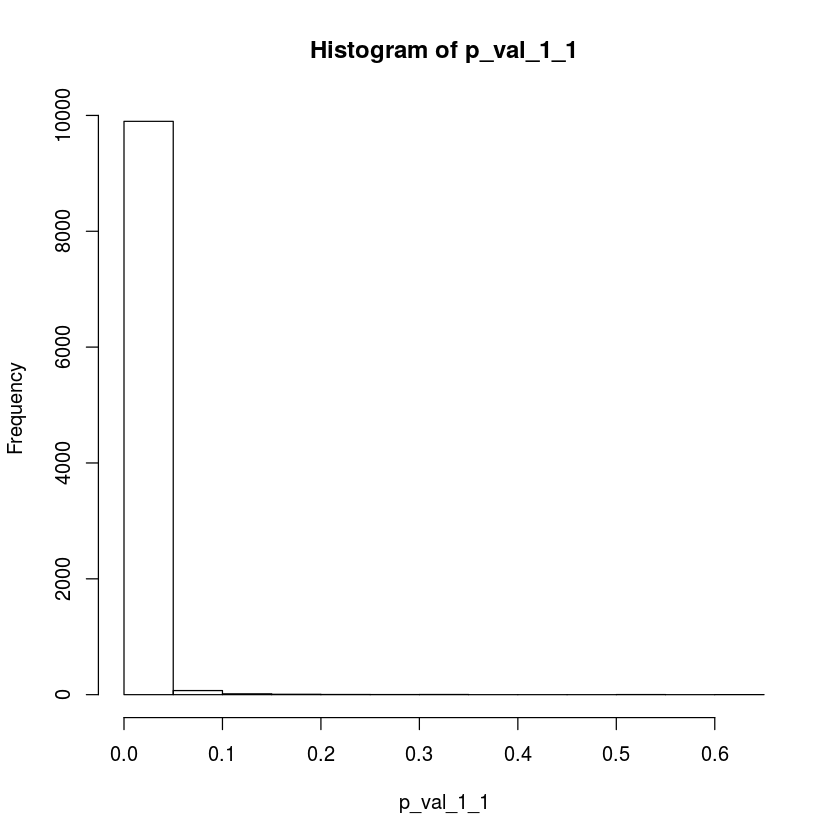

In [8]:

my.test = function(mu=0, sd=1) {
    samples = rnorm(20, mu, sd)
    t.test(samples, mu=0)$p.value
}

p_val_0_1 = replicate(10000, my.test())
hist(p_val_0_1)

p_val_neg0.5_1 = replicate(10000, my.test(-0.5, 1))
p_val_0.5_1 = replicate(10000, my.test(0.5, 1))
p_val_1_1 = replicate(10000, my.test(1, 1))

hist(p_val_neg0.5_1)
hist(p_val_0.5_1)
hist(p_val_1_1)
